## DT Regressor

In [1]:
import pandas as pd
df = pd.read_csv("dm.csv")

In [2]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [3]:
df['History'].fillna("new_cust",inplace=True)

In [4]:
df_ohe = pd.get_dummies(df,drop_first=True)

In [5]:
df_ohe.head(2)

,Salary,Children,Catalogs,AmountSpent,Cust_Id,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium,History_new_cust
0,47500,0,6,755,247,1,0,0,0,1,1,0,0,0
1,63600,0,6,1318,127,0,0,1,1,1,0,0,0,0


In [6]:
X = df_ohe.drop(['AmountSpent','Cust_Id'],axis=1).values
y = df_ohe['AmountSpent'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=200)

In [8]:
### Train a regressor
from sklearn import tree

In [9]:
reg = tree.DecisionTreeRegressor(max_depth=3)
reg = reg.fit(X_train,y_train)

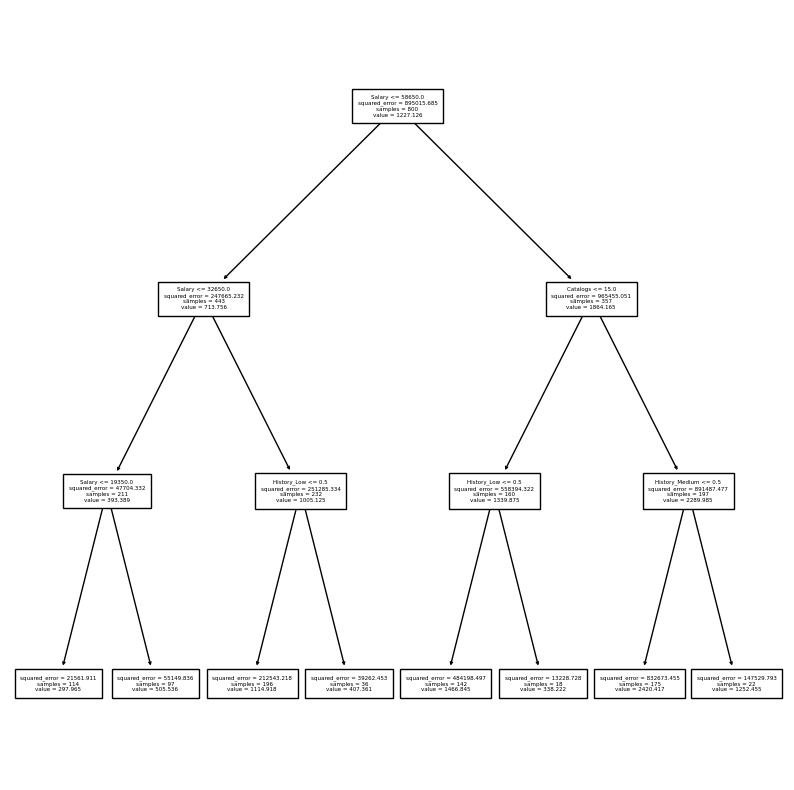

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(reg,feature_names=df_ohe.drop(['Cust_Id','AmountSpent'],axis=1).columns,fontsize=4)
plt.show()

In [11]:
### Feature importance
reg.feature_importances_

array([0.6825944 , 0.        , 0.17823288, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07955509,
       0.05961762, 0.        ])

In [12]:
feat_names = df_ohe.drop(['Cust_Id','AmountSpent'],axis=1).columns.tolist()

In [13]:
feat_imp = pd.DataFrame({'features':feat_names,'importances':reg.feature_importances_})

In [14]:
feat_imp = feat_imp.sort_values(by='importances',ascending=False)

In [15]:
feat_imp.index = feat_imp['features']

<Axes: xlabel='features'>

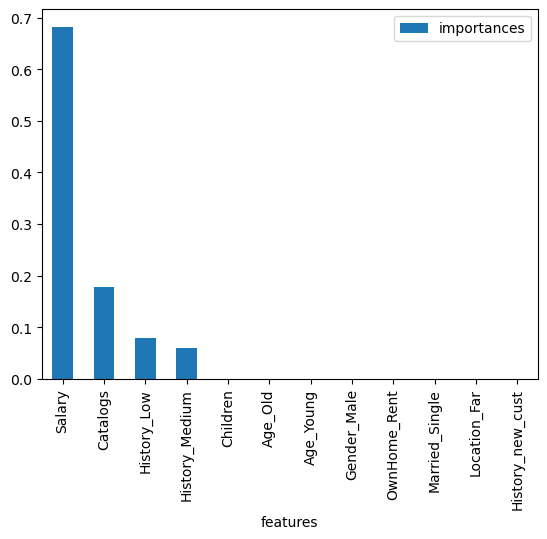

In [16]:
feat_imp.plot(kind="bar")